Multiclass Classification with SVM
Dataset: svm_multi.csv (3 classes, 2 features, 300 rows).
Task: Use SVM (RBF kernel) to classify data into 3 classes.
Report confusion matrix and accuracy.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('svm_multi.csv')

In [5]:
df.shape

(300, 3)

In [6]:
df.head()

,feature1,feature2,label
0,-7.430860,-7.899923,2
1,-7.912123,-7.341576,2
2,-1.522144,7.549274,0
3,4.378661,3.291702,1
4,-9.325377,-8.089813,2


In [7]:
df.tail()

,feature1,feature2,label
295,-3.890390,9.465124,0
296,3.645085,1.300952,1
297,-4.438178,9.235847,0
298,-6.857525,-4.868385,2
299,-5.836100,-5.253344,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  300 non-null    float64
 1   feature2  300 non-null    float64
 2   label     300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.2 KB


In [9]:
df.describe()

,feature1,feature2,label
count,300.000000,300.000000,300.000000
mean,-1.591404,1.354249,1.000000
std,4.965027,6.684234,0.817861
min,-9.845601,-9.642415,0.000000
25%,-6.115059,-6.197680,0.000000
50%,-2.551520,1.986865,1.000000
75%,3.797570,8.152121,2.000000
max,7.417469,12.278489,2.000000


In [10]:
df.dtypes

feature1    float64
feature2    float64
label         int64
dtype: object

In [11]:
df.isnull().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [12]:
df.isna().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.skew()

feature1    0.302210
feature2   -0.142904
label       0.000000
dtype: float64

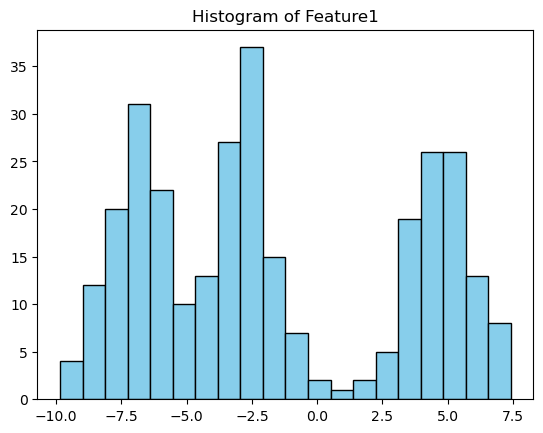

In [16]:
plt.hist(df['feature1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Feature1')
plt.show()

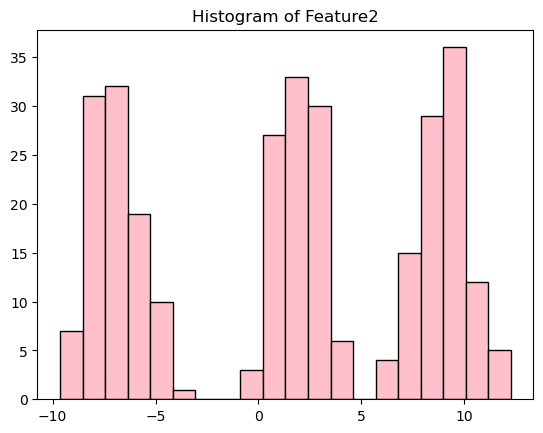

In [17]:
plt.hist(df['feature2'], bins=20, color='pink', edgecolor='black')
plt.title('Histogram of Feature2')
plt.show()

C:\Users\boomi\AppData\Local\Temp\ipykernel_20296\1889216399.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['feature1'], df['feature2']], labels=['feature1', 'feature2'])
C:\Users\boomi\AppData\Local\Temp\ipykernel_20296\1889216399.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


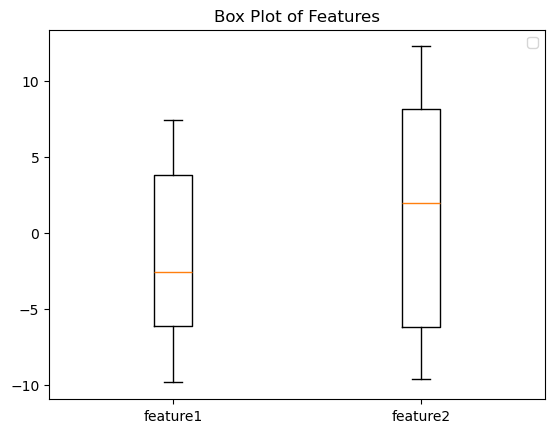

In [18]:
plt.boxplot([df['feature1'], df['feature2']], labels=['feature1', 'feature2'])
plt.title('Box Plot of Features')
plt.legend()
plt.show()

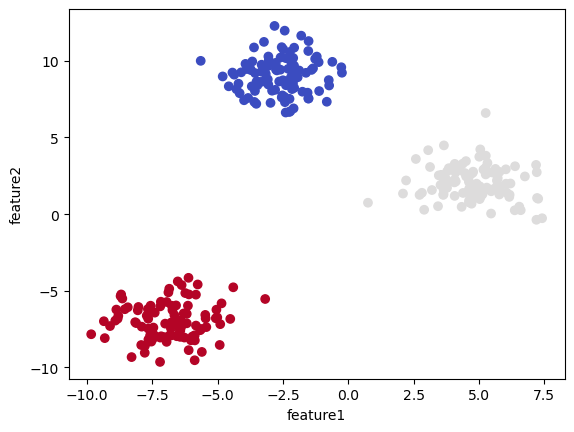

In [19]:
plt.scatter(df['feature1'],df['feature2'],c=df['label'],cmap='coolwarm')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

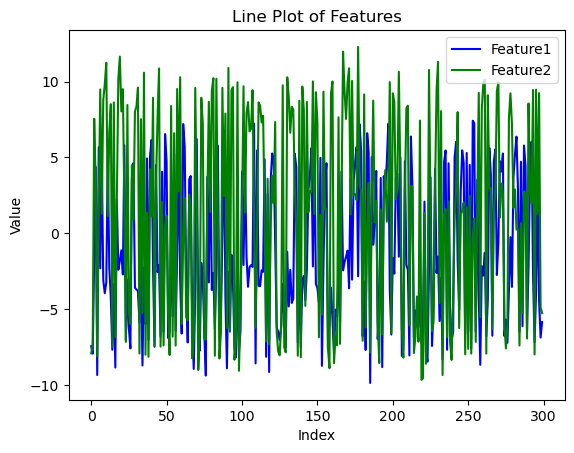

In [20]:
plt.plot(df['feature1'], label='Feature1', color='blue')
plt.plot(df['feature2'], label='Feature2', color='green')
plt.title('Line Plot of Features')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:
df.corr()

,feature1,feature2,label
feature1,1.000000,0.406326,-0.348119
feature2,0.406326,1.000000,-0.982169
label,-0.348119,-0.982169,1.000000


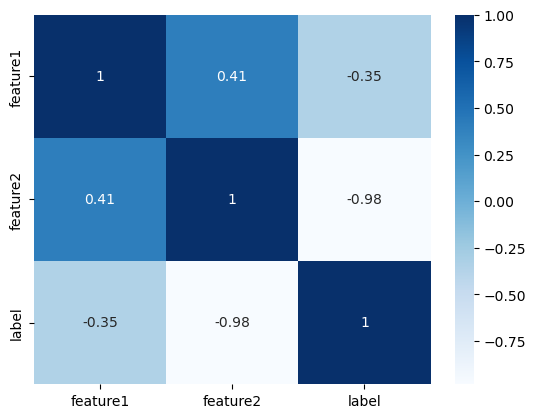

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
X = df.drop(columns='label')
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",cm)

Accuracy: 1.0
Confusion matrix:
 [[29  0  0]
 [ 0 26  0]
 [ 0  0 35]]
